In [5]:
%matplotlib inline
import os
import sys
AbsPath = os.path.abspath("")
sys.path.append(AbsPath+"/../..")
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from Scripts.Plots import SDSS_Plots
import pickle
from Functions import Functions as F
from itertools import cycle
from copy import copy
from scipy import interpolate
from colossus.cosmology import cosmology
from halotools import empirical_models
from astropy.cosmology import Planck15 as Cosmo_AstroPy
from numba import jit
cosmology.setCosmology("planck15")
Cosmo = cosmology.getCurrent()
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting the SDSS plots
#gets the HMF interpolation function
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1
h = Cosmo.h
h_3 = h*h*h

/Users/haofu/.conda/envs/STEEL/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


FRACKSKY= 0.1404020420493216


In [6]:
#Abundance Matching Parameters
#Abundance Matching Parameters
Override =\
{\
'M10':11.95,\
'SHMnorm10':0.03,\
'beta10':1.6,\
'gamma10':0.7,\
'M11':0.5,\
'SHMnorm11':-0.01,\
'beta11':-0.6,\
'gamma11':0.1\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'z_Evo':True,\
'Scatter': 0.11,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT3': False,\
'g_PFT4': False\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE'\
}

In [4]:
Data_AC = F.LoadData_Mergers((1.0, False, False, True, True, 'PFT1'))
Accretion_History_PFT1, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac((1.0, False, False, True, True, 'PFT1'))
Pair_Frac_PFT1, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

FileNotFoundError: [Errno 2] No such file or directory: '/Users/haofu/PycharmProjects/STEEL/Notebooks/Tests/../../Functions/../Data/Model/Output/RunFiles/RunParam_1.0_False_False_True_True_PFT1_/Mergers_Accretion_History.npy'

In [ ]:
Data_AC = F.LoadData_Mergers((1.0, False, False, True, True, 'PFT2'))
Accretion_History_PFT2, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac((1.0, False, False, True, True, 'PFT2'))
Pair_Frac_PFT2, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

In [ ]:
Data_AC = F.LoadData_Mergers((1.0, False, False, True, True, 'PFT3'))
Accretion_History_PFT3, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac((1.0, False, False, True, True, 'PFT3'))
Pair_Frac_PFT3, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

In [7]:
##### Hao
Data_AC = F.LoadData_Mergers(('1.0', True, False, True, 'G19_DPL', 'M_PFT1'))
Accretion_History_PFT1, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac(('1.0', True, False, True, 'G19_DPL', 'M_PFT1'))
Pair_Frac_PFT1, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

In [8]:
##### Hao
Data_AC = F.LoadData_Mergers(('1.0', True, False, True, 'G19_DPL', 'M_PFT2'))
Accretion_History_PFT2, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac(('1.0', True, False, True, 'G19_DPL', 'M_PFT2'))
Pair_Frac_PFT2, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

In [9]:
##### Hao
Data_AC = F.LoadData_Mergers(('1.0', True, False, True, 'G19_DPL', 'M_PFT3'))
Accretion_History_PFT3, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
Data_PF = F.LoadData_Pair_Frac(('1.0', True, False, True, 'G19_DPL', 'M_PFT3'))
Pair_Frac_PFT3, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_PF

In [10]:
print('Accretion_History Shape:', (np.shape(Accretion_History_PFT1)))
print('Pair_Frac Shape:', (np.shape(Pair_Frac_PFT1)))
print('z Shape, Min, Max:', (np.shape(z)), np.min(z), np.max(z))
print('AvaHaloMass Shape:', (np.shape(AvaHaloMass)))
print('Surviving_Sat_SMF_MassRange Shape:', (np.shape(Surviving_Sat_SMF_MassRange)))

Accretion_History Shape: (190, 57, 40)
Pair_Frac Shape: (190, 57, 40)
z Shape, Min, Max: (190,) 0.1035 6.0802
AvaHaloMass Shape: (190, 57)
Surviving_Sat_SMF_MassRange Shape: (40,)


In [11]:
Delta_T = Cosmo.lookbackTime(z[1:]) - Cosmo.lookbackTime(z[:-1])
Delta_T = np.insert(Delta_T, 0, Delta_T[0])
SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
#Account for central bin shrinking
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)
print(SM_Bin)

0.09999999999999964


Make 'AvaStellarMass'

Note this isnt including scatter so very much a WIP


Where I have decreased the binsize the SMHM relation is occasionaly not monotomically increasing (dotn know why) this smooths it out for np.digitixe

In [14]:
AbnMtch['PFT'] = True
AbnMtch['PFT1'] = True

AvaStellarMass_PFT1 = []
for i, HM_Arr in enumerate(AvaHaloMass):
    AvaStellarMass_PFT1.append(F.DarkMatterToStellarMass(HM_Arr-np.log10(h), z[i], Paramaters))
AvaStellarMass_PFT1 = np.array(AvaStellarMass_PFT1)

#Where I have decreased the binsize the SMHM relation is occasionaly not monotomically increasing (dotn know why) this smooths it out for np.digitixe

Parent_Cut = 11.0
AvaStellarMass2 = copy(AvaStellarMass_PFT1)
for i, SM_Arr in enumerate(AvaStellarMass_PFT1):
    try:
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)
    except:
        for j in range(0, len(SM_Arr)-1):
            if SM_Arr[j+1] <= SM_Arr[j]:
                if j+2 == len(SM_Arr):
                    AvaStellarMass2[i, j+1] = 2*SM_Arr[j] - SM_Arr[j-1]
                else:
                    AvaStellarMass2[i, j+1] = (SM_Arr[j] + SM_Arr[j+2])/2
AvaStellarMass_PFT1 = AvaStellarMass2


AvaStellarMassBins_PFT1 = AvaStellarMass_PFT1[:,1:] - AvaStellarMass_PFT1[:,:-1] 
AvaStellarMassBins_PFT1 = np.concatenate((AvaStellarMassBins_PFT1, np.array([AvaStellarMassBins_PFT1[:,-1]]).T), axis = 1)
plt.plot(AvaStellarMass_PFT1[0], np.log10(HMF_fun(AvaHaloMass[0], z[0])*h_3*AvaHaloMassBins[0]/AvaStellarMassBins_PFT1[0]),  label = "PFT1")

AbnMtch['PFT1'] = False
AbnMtch['PFT2'] = True

AvaStellarMass_PFT2 = []
for i, HM_Arr in enumerate(AvaHaloMass):
    AvaStellarMass_PFT2.append(F.DarkMatterToStellarMass(HM_Arr-np.log10(h), z[i], Paramaters))
AvaStellarMass_PFT2 = np.array(AvaStellarMass_PFT2)

#Where I have decreased the binsize the SMHM relation is occasionaly not monotomically increasing (dotn know why) this smooths it out for np.digitixe

Parent_Cut = 11.0
AvaStellarMass2 = copy(AvaStellarMass_PFT2)
for i, SM_Arr in enumerate(AvaStellarMass_PFT2):
    try:
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)
    except:
        for j in range(0, len(SM_Arr)-1):
            if SM_Arr[j+1] <= SM_Arr[j]:
                if j+2 == len(SM_Arr):
                    AvaStellarMass2[i, j+1] = 2*SM_Arr[j] - SM_Arr[j-1]
                else:
                    AvaStellarMass2[i, j+1] = (SM_Arr[j] + SM_Arr[j+2])/2
AvaStellarMass_PFT2 = AvaStellarMass2


AvaStellarMassBins_PFT2 = AvaStellarMass_PFT2[:,1:] - AvaStellarMass_PFT2[:,:-1] 
AvaStellarMassBins_PFT2 = np.concatenate((AvaStellarMassBins_PFT2, np.array([AvaStellarMassBins_PFT2[:,-1]]).T), axis = 1)
plt.plot(AvaStellarMass_PFT2[0], np.log10(HMF_fun(AvaHaloMass[0], z[0])*h_3*AvaHaloMassBins[0]/AvaStellarMassBins_PFT2[0]),  label = "PFT2")

AbnMtch['PFT2'] = False
AbnMtch['PFT3'] = True

AvaStellarMass_PFT3 = []
for i, HM_Arr in enumerate(AvaHaloMass):
    AvaStellarMass_PFT3.append(F.DarkMatterToStellarMass(HM_Arr-np.log10(h), z[i], Paramaters))
AvaStellarMass_PFT3 = np.array(AvaStellarMass_PFT3)

#Where I have decreased the binsize the SMHM relation is occasionaly not monotomically increasing (dotn know why) this smooths it out for np.digitixe

Parent_Cut = 11.0
AvaStellarMass2 = copy(AvaStellarMass_PFT3)
for i, SM_Arr in enumerate(AvaStellarMass_PFT3):
    try:
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)
    except:
        for j in range(0, len(SM_Arr)-1):
            if SM_Arr[j+1] <= SM_Arr[j]:
                if j+2 == len(SM_Arr):
                    AvaStellarMass2[i, j+1] = 2*SM_Arr[j] - SM_Arr[j-1]
                else:
                    AvaStellarMass2[i, j+1] = (SM_Arr[j] + SM_Arr[j+2])/2
AvaStellarMass_PFT3 = AvaStellarMass2


AvaStellarMassBins_PFT3 = AvaStellarMass_PFT3[:,1:] - AvaStellarMass_PFT3[:,:-1] 
AvaStellarMassBins_PFT3 = np.concatenate((AvaStellarMassBins_PFT3, np.array([AvaStellarMassBins_PFT3[:,-1]]).T), axis = 1)

plt.plot(AvaStellarMass_PFT3[0], np.log10(HMF_fun(AvaHaloMass[0], z[0])*h_3*AvaHaloMassBins[0]/AvaStellarMassBins_PFT3[0]),  label = "PFT3")

AbnMtch['PFT3'] = False
AbnMtch['PFT'] = False
plt.legend()
plt.show()

KeyError: 'Illustris'

# PairFrac

Checking to see diffrences between SMHM models

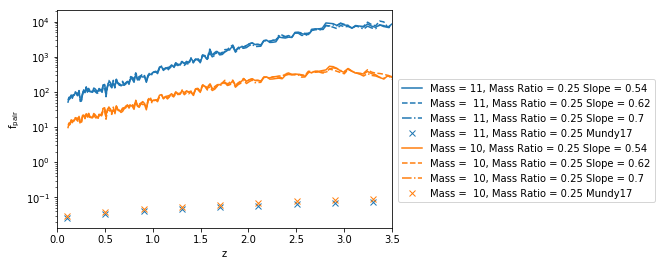

In [17]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
for Parent_Cut in [11, 10]:
    Upper_Cut = 12.5#Parent_Cut +0.5#12.5
    colour = next(colourcycler)
    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT1):
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)
        M_Cut_bin_upper = np.digitize(Upper_Cut, SM_Arr)

        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            Sat_Mass_Cut_bin = np.digitize(SM_Arr[M_Cut_bin + j]+Mass_Ratio, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT1[i, M_Cut_bin+j, Sat_Mass_Cut_bin:])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)

    plt.semilogy(z[1:], (PairFracTot[1:]),  "-", label = "Mass = {}, Mass Ratio = {:0.2f} Slope = 0.54".format(Parent_Cut, 10**Mass_Ratio),color = colour)

    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT2):
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)   
        M_Cut_bin_upper = np.digitize(Upper_Cut, SM_Arr)
        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            CutMass = SM_Arr[M_Cut_bin + j]+Mass_Ratio # np.max([SM_Arr[M_Cut_bin + j]+Mass_Ratio, Parent_Cut])
            Sat_Mass_Cut_bin = np.digitize(CutMass, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT2[i, M_Cut_bin+j, Sat_Mass_Cut_bin:M_Cut_bin_upper])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)
    plt.semilogy(z[1:], (PairFracTot[1:]),  "--", label = "Mass =  {}, Mass Ratio = {:0.2f} Slope = 0.62".format(Parent_Cut, 10**Mass_Ratio),color = colour)


    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT3):
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)   
        M_Cut_bin_upper = np.digitize(Upper_Cut, SM_Arr)
        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            CutMass = SM_Arr[M_Cut_bin + j]+Mass_Ratio # np.max([SM_Arr[M_Cut_bin + j]+Mass_Ratio, Parent_Cut])
            Sat_Mass_Cut_bin = np.digitize(CutMass, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT3[i, M_Cut_bin+j, Sat_Mass_Cut_bin:M_Cut_bin_upper])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)
    plt.semilogy(z[1:], (PairFracTot[1:]),  "-.",label = "Mass =  {}, Mass Ratio = {:0.2f} Slope = 0.7".format(Parent_Cut, 10**Mass_Ratio),color = colour)        

    if Parent_Cut == 11.0:    
        #f0, m, N = 0.031, 0.52, 0.5
        f0, m, N = 0.024, 0.78, 0.5
    elif Parent_Cut == 10.0: 
        #f0, m, N = 0.028, 0.80, 0.5
        f0, m, N = 0.028, 0.80, 0.5

    #plt.plot(z[1:], np.log10(f0*np.power(1+z[1:], m)), label = "{}, {:0.2f} Mundy17".format(Parent_Cut, 10**Mass_Ratio))
    #plt.plot(z[1:], np.log10(PairFracTot[1:]), label = "{}, {:0.2f} STEEL".format(Parent_Cut, 10**Mass_Ratio))

    plt.semilogy(np.arange(z[0], z[-1], 0.4), (f0*np.power(1+np.arange(z[0], z[-1], 0.4), m)),  "x",label = "Mass =  {}, Mass Ratio = {:0.2f} Mundy17".format(Parent_Cut, 10**Mass_Ratio),color = colour)


plt.xlim(0, 3.5)
#plt.ylim(-3.0, -0.5)
plt.legend(loc = 7, bbox_to_anchor=(1.8, 0.4))
plt.xlabel('z')
plt.ylabel('$\mathrm{f_{pair}}$')
plt.show()

Same as above but at fixed number density

In [19]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def Return_Cent_SMF(z_in, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT1'):
    AbnMtch['PFT'] = True
    AbnMtch[Fit] = True
    HM_Bin = 0.01
    HM_Range = np.arange(9, 15, HM_Bin)
    cSMF_X, cSMF_Y = F.DM_to_SM(SMF_X, np.log10(HMF_fun(HM_Range, z_in)), HM_Range, HM_Bin, SMF_X_Bin, Paramaters, Redshift = z_in, N = 3000)    
    AbnMtch[Fit] = False
    AbnMtch['PFT'] = False
    AbnMtch['G18'] = True
    return running_mean(cSMF_X, N), running_mean(cSMF_Y, N), SMF_X_Bin*N

Redshifts = np.arange(0.1, 4, 0.1)
X, SMFs_PFT1, SMF_bw = Return_Cent_SMF(0, Fit = 'PFT1')
X, SMFs_PFT2, SMF_bw = Return_Cent_SMF(0, Fit = 'PFT2')
X, SMFs_PFT3, SMF_bw = Return_Cent_SMF(0, Fit = "PFT3")
SMFs_PFT1 = pd.Series(SMFs_PFT1).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()
SMFs_PFT2 = pd.Series(SMFs_PFT2).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()
SMFs_PFT3 = pd.Series(SMFs_PFT3).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()
for i in Redshifts:
    SMFs_PFT1 = np.vstack((SMFs_PFT1, pd.Series(Return_Cent_SMF(i, Fit = 'PFT1')[1]).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()))
    SMFs_PFT2 = np.vstack((SMFs_PFT2, pd.Series(Return_Cent_SMF(i, Fit = 'PFT2')[1]).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()))
    SMFs_PFT3 = np.vstack((SMFs_PFT3, pd.Series(Return_Cent_SMF(i, Fit = "PFT3")[1]).replace([np.inf, -np.inf], np.nan).interpolate().get_values().tolist()))
Redshifts = np.insert(Redshifts, 0, 0)
SMF_interp_PFT1 = interpolate.interp2d(X, Redshifts, SMFs_PFT1)
SMF_interp_PFT2 = interpolate.interp2d(X, Redshifts, SMFs_PFT2)
SMF_interp_PFT3 = interpolate.interp2d(X, Redshifts, SMFs_PFT3)

In [20]:
X1, Y1, BW = Return_Cent_SMF(3, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT1')
X2, Y2, BW = Return_Cent_SMF(3, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT2')
X3, Y3, BW = Return_Cent_SMF(3, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT3')

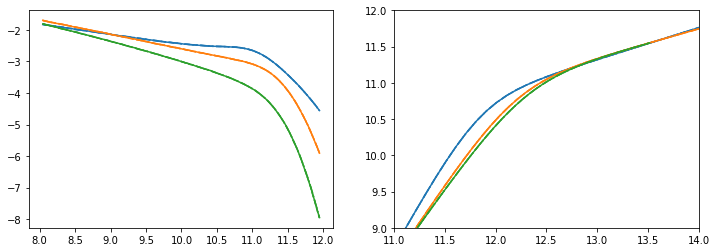

In [21]:
f, SubPlots = plt.subplots(1, 2, figsize = (12,4))
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)

for i in [0, 1.5, 3]:
    colour = next(colourcycler)
    X1, Y1, BW = Return_Cent_SMF(i, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT1')
    X2, Y2, BW = Return_Cent_SMF(i, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT2')
    X3, Y3, BW = Return_Cent_SMF(i, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT3')
    SubPlots[0].plot(X1, Y1, "-",label = "PFT1", color = colour)
    SubPlots[0].plot(X2, Y2,  "--",label = "PFT2", color = colour)
    SubPlots[0].plot(X3, Y3,  "-.",label = "PFT3", color = colour)
    z_bin = np.digitize(i, bins = z)
    SubPlots[1].plot(AvaHaloMass[z_bin], AvaStellarMass_PFT1[z_bin], "-",label = "PFT1", color = colour)
    SubPlots[1].plot(AvaHaloMass[z_bin], AvaStellarMass_PFT2[z_bin],  "--",label = "PFT2", color = colour)
    SubPlots[1].plot(AvaHaloMass[z_bin], AvaStellarMass_PFT3[z_bin],  "-.",label = "PFT3", color = colour)
SubPlots[1].set_xlim(11, 14)
SubPlots[1].set_ylim(9, 12)
plt.show()

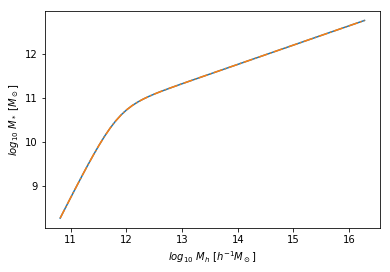

In [22]:
z_bin = np.digitize(0.1, bins = z)
plt.plot(AvaHaloMass[z_bin], AvaStellarMass_PFT1[z_bin], "-",label = "PFT1", color = "C0")
#plt.plot(AvaHaloMass[z_bin], AvaStellarMass_PFT2[z_bin],  "--",label = "PFT2", color = colour)
plt.plot(AvaHaloMass[z_bin], AvaStellarMass_PFT3[z_bin],  "-.",label = "PFT3", color = "C1")
plt.xlabel("$log_{10}$ $M_h$ [$h^{-1}M_\odot$]")
plt.ylabel("$log_{10}$ $M_*$ [$M_\odot$]")
plt.show()

In [23]:
X1, Y1, BW = Return_Cent_SMF(0.1, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT1')
X2, Y2, BW = Return_Cent_SMF(0.1, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT2')
X3, Y3, BW = Return_Cent_SMF(0.1, SMF_X = np.arange(8, 12, 0.01), SMF_X_Bin = 0.01, N = 10, Fit = 'PFT3')


SM IN: 11.0 Msun Out: [10.90488813] Msun


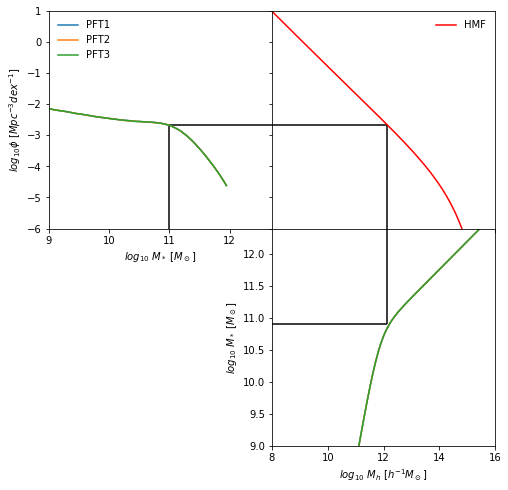

In [24]:
f, SubPlots = plt.subplots(2, 2, figsize = (8,8), sharex = 'col', sharey = 'row')

#use the SMF interp to get the numberdensity of a given stellarmass population
Interp_Mass = 11.0 #log10 M*
Number_Cut = SMF_interp_PFT1(Interp_Mass, 0.01) #N Mpc dex-1

SubPlots[0][0].plot(X1, Y1, label = "PFT1")
SubPlots[0][0].plot(X2, Y2,  label = "PFT2")
SubPlots[0][0].plot(X3, Y3,  label = "PFT3")
SubPlots[0][0].vlines(Interp_Mass, -6, Number_Cut)
SubPlots[0][0].hlines(Number_Cut, Interp_Mass, 12.7)
SubPlots[0][0].set_xlim(9, 12.7)
SubPlots[0][0].legend(loc = 2, frameon = False)
SubPlots[0][0].set_xlabel("$log_{10}$ $M_*$ [$M_\odot$]")
SubPlots[0][0].set_ylabel("$log_{10} \phi$ $[Mpc^{-3} dex^{-1}]$")
SpoofHalos = np.arange(8, 16, 0.01) #log10 Mh h-1
HM_Wt = np.log10(HMF_fun(SpoofHalos, 0.1)*h_3) #N Mpc dex^-1

SpoofCut = np.digitize(Number_Cut, bins = HM_Wt)
HM_To_Cut_At = SpoofHalos[SpoofCut]  #Mh h^-1
N_Cut_bin = np.digitize(HM_To_Cut_At , bins = AvaHaloMass[0]) #AvaHaloMass is Mh h^-1

SubPlots[0][1].plot(SpoofHalos, HM_Wt, "r",label = "HMF")
#SubPlots[0][0].plot(SpoofHalos, HM_Wt, "r",label = "HMF")
SubPlots[0][1].hlines(Number_Cut, 8, HM_To_Cut_At)
SubPlots[0][1].vlines(HM_To_Cut_At, -12, Number_Cut)
SubPlots[0][1].legend(loc = 1, frameon = False)



print("SM IN:", Interp_Mass, "Msun Out:", AvaStellarMass_PFT1[0,N_Cut_bin], "Msun")


SubPlots[1][1].vlines(HM_To_Cut_At, AvaStellarMass_PFT1[0][N_Cut_bin], 12.4)
SubPlots[1][1].hlines(AvaStellarMass_PFT1[0][N_Cut_bin], 8, HM_To_Cut_At)
SubPlots[1][1].plot(AvaHaloMass[0], AvaStellarMass_PFT1[0])
SubPlots[1][1].plot(AvaHaloMass[0], AvaStellarMass_PFT2[0])
SubPlots[1][1].plot(AvaHaloMass[0], AvaStellarMass_PFT3[0])
SubPlots[1][1].set_xlabel("$log_{10}$ $M_h$ [$h^{-1}M_\odot$]")
SubPlots[1][1].set_ylabel("$log_{10}$ $M_*$ [$M_\odot$]")


SubPlots[0][1].set_ylim(-6, 1)
SubPlots[0][1].set_xlim(8, 16)
SubPlots[1][1].set_ylim(9, 12.4)
SubPlots[0][0].xaxis.set_tick_params(labelbottom=True)
SubPlots[1][1].yaxis.set_tick_params(labelbottom=True)
SubPlots[1][0].set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()




In [25]:
def Get_CND_Masses(M = 11, z = 0.1, Fit = "PFT1"):
    MassRange = np.arange(7, 15, 0.1)
    PFT1_int = SMF_interp_PFT1(MassRange, z)
    PFT2_int = SMF_interp_PFT2(MassRange, z)
    PFT3_int = SMF_interp_PFT3(MassRange, z)
    SMF_interp_PFT1_inv = interpolate.interp1d(PFT1_int, MassRange)
    SMF_interp_PFT2_inv = interpolate.interp1d(PFT2_int, MassRange)
    SMF_interp_PFT3_inv = interpolate.interp1d(PFT3_int, MassRange)
    
    if Fit == "PFT1":
        ND = SMF_interp_PFT1(M, z)[0]
        try:
            return M, SMF_interp_PFT2_inv(ND), SMF_interp_PFT3_inv(ND)
        except:
            print(ND)
    if Fit == "PFT2":
        ND = SMF_interp_PFT2(M, z)[0]
        return SMF_interp_PFT1_inv(ND), M, MF_interp_PFT3_inv(ND)
    if Fit == "PFT3":
        ND = SMF_interp_PFT3(M, z)[0]
        return SMF_interp_PFT1_inv(ND), SMF_interp_PFT2_inv(ND), M

In [26]:
print("z, PFT1, PFT2, PFT3")
for i, z_ in enumerate(z):
    A, B, C = Get_CND_Masses(M = 11.5, z = z_)
    if i%10 == 0: 
        print(z_, ":", A, B, C)

z, PFT1, PFT2, PFT3
0.1035 : 11.5 11.500835842843363 11.499173010960385
0.2175 : 11.5 11.501616175237524 11.500408250267368
0.3433 : 11.5 11.500111944794359 11.501165119920707
0.4822 : 11.5 11.501796377874 11.500852764688398
0.6354 : 11.5 11.500347742803555 11.50099354709517
0.8044 : 11.5 11.498583819909115 11.498955262811885
0.9908 : 11.5 11.500913026648881 11.500760342895445
1.1966 : 11.5 11.500666228847665 11.499170533060063
1.4236 : 11.5 11.500948084136045 11.499335656468416
1.6741 : 11.5 11.49833431620796 11.499164453788651
1.9505 : 11.5 11.501446746231663 11.500548444328786
2.2554 : 11.5 11.500287207960934 11.501339436652184
2.5919 : 11.5 11.49917384499369 11.499963575755633
2.9631 : 11.5 11.498975030478581 11.500723842656397
3.3727 : 11.5 11.500143086392972 11.499496183423698
3.8246 : 11.5 11.49909783257964 11.497804874277962
4.3232 : 11.5 11.498514363596374 11.49949800828113
4.8734 : 11.5 11.498514363596374 11.49949800828113
5.4804 : 11.5 11.498514363596374 11.49949800828113


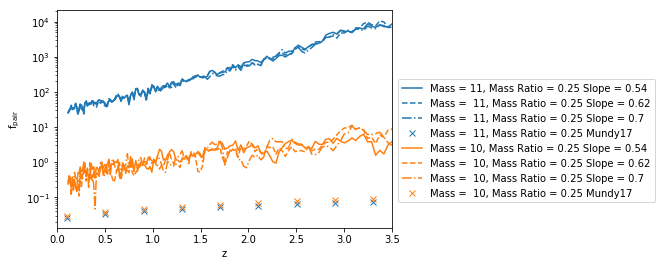

In [27]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
Fit_For_CNDMass = "PFT1"
for Parent_Cut in [11, 10]:
    Upper_Cut = Parent_Cut +0.5#12.5
    colour = next(colourcycler)
    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT1):
        CND_Mass = Get_CND_Masses(M = Parent_Cut, z = z[i], Fit = Fit_For_CNDMass)[0]
        M_Cut_bin = np.digitize(CND_Mass, SM_Arr)
        CND_Mass_Upper = Get_CND_Masses(M = Upper_Cut, z = z[i], Fit = Fit_For_CNDMass)[0]
        M_Cut_bin_upper = np.digitize(CND_Mass_Upper, SM_Arr)
        #M_Cut_bin_upper = np.digitize(CND_Mass + 0.5, SM_Arr)

        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            Sat_Mass_Cut_bin = np.digitize(SM_Arr[M_Cut_bin + j]+Mass_Ratio, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT1[i, M_Cut_bin+j, Sat_Mass_Cut_bin:])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)

    plt.semilogy(z[1:], (PairFracTot[1:]),  "-", label = "Mass = {}, Mass Ratio = {:0.2f} Slope = 0.54".format(Parent_Cut, 10**Mass_Ratio),color = colour)

    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT2):
        CND_Mass = Get_CND_Masses(M = Parent_Cut, z = z[i], Fit = Fit_For_CNDMass)[1]
        M_Cut_bin = np.digitize(CND_Mass, SM_Arr)
        CND_Mass_Upper = Get_CND_Masses(M = Upper_Cut, z = z[i], Fit = Fit_For_CNDMass)[1]
        M_Cut_bin_upper = np.digitize(CND_Mass_Upper, SM_Arr)
        #M_Cut_bin_upper = np.digitize(CND_Mass + 0.5, SM_Arr)
        
        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            CutMass = SM_Arr[M_Cut_bin + j]+Mass_Ratio # np.max([SM_Arr[M_Cut_bin + j]+Mass_Ratio, Parent_Cut])
            Sat_Mass_Cut_bin = np.digitize(CutMass, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT2[i, M_Cut_bin+j, Sat_Mass_Cut_bin:M_Cut_bin_upper])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)
    plt.semilogy(z[1:], (PairFracTot[1:]),  "--", label = "Mass =  {}, Mass Ratio = {:0.2f} Slope = 0.62".format(Parent_Cut, 10**Mass_Ratio),color = colour)


    #Parent_Cut = 10.0
    Mass_Ratio = np.log10(1/4)
    SM_Bin = Surviving_Sat_SMF_MassRange[1] - Surviving_Sat_SMF_MassRange[0]
    PairFracTot = []
    for i, SM_Arr in enumerate(AvaStellarMass_PFT3):
        CND_Mass = Get_CND_Masses(M = Parent_Cut, z = z[i], Fit = Fit_For_CNDMass)[2]
        M_Cut_bin = np.digitize(CND_Mass, SM_Arr)
        CND_Mass_Upper = Get_CND_Masses(M = Upper_Cut, z = z[i], Fit = Fit_For_CNDMass)[2]
        M_Cut_bin_upper = np.digitize(CND_Mass_Upper, SM_Arr)
        #M_Cut_bin_upper = np.digitize(CND_Mass + 0.5, SM_Arr)
        
        Total_Pair = 0

        for j, Cent_Mass in enumerate(AvaHaloMass[i, M_Cut_bin:M_Cut_bin_upper]):
            CutMass = SM_Arr[M_Cut_bin + j]+Mass_Ratio # np.max([SM_Arr[M_Cut_bin + j]+Mass_Ratio, Parent_Cut])
            Sat_Mass_Cut_bin = np.digitize(CutMass, Surviving_Sat_SMF_MassRange)
            Total_Pair += np.sum(Pair_Frac_PFT3[i, M_Cut_bin+j, Sat_Mass_Cut_bin:M_Cut_bin_upper])*SM_Bin

        if len(AvaHaloMass[i,M_Cut_bin:]) > 0:
            Total_Cent = np.sum(HMF_fun(AvaHaloMass[i,M_Cut_bin:M_Cut_bin_upper], z[i])*h_3*AvaHaloMassBins[i,M_Cut_bin:M_Cut_bin_upper])
            #Total_Cent = 1
            PairFracTot.append(np.divide(Total_Pair, Total_Cent))
        else:
            PairFracTot.append(np.nan)
    plt.semilogy(z[1:], (PairFracTot[1:]),  "-.",label = "Mass =  {}, Mass Ratio = {:0.2f} Slope = 0.7".format(Parent_Cut, 10**Mass_Ratio),color = colour)        

    if Parent_Cut == 11.0:    
        #f0, m, N = 0.031, 0.52, 0.5
        f0, m, N = 0.024, 0.78, 0.5
    elif Parent_Cut == 10.0: 
        #f0, m, N = 0.028, 0.80, 0.5
        f0, m, N = 0.028, 0.80, 0.5

    #plt.plot(z[1:], np.log10(f0*np.power(1+z[1:], m)), label = "{}, {:0.2f} Mundy17".format(Parent_Cut, 10**Mass_Ratio))
    #plt.plot(z[1:], np.log10(PairFracTot[1:]), label = "{}, {:0.2f} STEEL".format(Parent_Cut, 10**Mass_Ratio))

    plt.semilogy(np.arange(z[0], z[-1], 0.4), (f0*np.power(1+np.arange(z[0], z[-1], 0.4), m)),  "x",label = "Mass =  {}, Mass Ratio = {:0.2f} Mundy17".format(Parent_Cut, 10**Mass_Ratio),color = colour)


plt.xlim(0, 3.5)
#plt.ylim(-3.0, -0.5)
plt.legend(loc = 7, bbox_to_anchor=(1.8, 0.4))
plt.xlabel('z')
plt.ylabel('$\mathrm{f_{pair}}$')
plt.show()

# MergerRates, Massaccretion and Morphological Fraction

Loading STEEL

In [28]:
Fit = 'G19_SE'
Data_AC = F.LoadData_Mergers((1.0, False, False, True, "CE", Fit))
Accretion_History_G18, z, AvaHaloMass, Surviving_Sat_SMF_MassRange = Data_AC
SM_Bin = Surviving_Sat_SMF_MassRange[1]-Surviving_Sat_SMF_MassRange[0]

#Account for central bin shrinking
AvaHaloMassBins = AvaHaloMass[:,1:] - AvaHaloMass[:,:-1] 
AvaHaloMassBins = np.concatenate((AvaHaloMassBins, np.array([AvaHaloMassBins[:,-1]]).T), axis = 1)

AbnMtch[Fit] = True
AvaStellarMass_G18 = []
for i, HM_Arr in enumerate(AvaHaloMass):
    AvaStellarMass_G18.append(F.DarkMatterToStellarMass(HM_Arr-np.log10(h), z[i], Paramaters))
AvaStellarMass_G18 = np.array(AvaStellarMass_G18)

#Where I have decreased the binsize the SMHM relation is occasionaly not monotomically increasing (dotn know why) this smooths it out for np.digitixe

Parent_Cut = 11.0
AvaStellarMass2 = copy(AvaStellarMass_G18)
for i, SM_Arr in enumerate(AvaStellarMass_G18):
    try:
        M_Cut_bin = np.digitize(Parent_Cut, SM_Arr)
    except:
        for j in range(0, len(SM_Arr)-1):
            if SM_Arr[j+1] <= SM_Arr[j]:
                if j+2 == len(SM_Arr):
                    AvaStellarMass2[i, j+1] = 2*SM_Arr[j] - SM_Arr[j-1]
                else:
                    AvaStellarMass2[i, j+1] = (SM_Arr[j] + SM_Arr[j+2])/2
AvaStellarMass_G18 = AvaStellarMass2


AvaStellarMassBins_G18 = AvaStellarMass_G18[:,1:] - AvaStellarMass_G18[:,:-1] 
AvaStellarMassBins_G18 = np.concatenate((AvaStellarMassBins_G18, np.array([AvaStellarMassBins_G18[:,-1]]).T), axis = 1)
AbnMtch[Fit] = False

Loading SDSS

In [29]:
Header=['galcount','finalflag','z','Vmaxwt','MsMendSerExp','AbsMag','logReSerExp',
                                  'BT','n_bulge','NewLCentSat','NewMCentSat'
                                  ,'MhaloL','probaE','probaEll',
                                'probaS0','probaSab','probaScd','TType','P_S0',
                              'veldisp','veldisperr','raSDSS7','decSDSS7']

df = pd.read_csv('./Bernardi_SDSS/new_catalog_morph_flag_rtrunc.dat', header = None, names = Header, skiprows = 1, delim_whitespace = True)
goodness_cut = (df.finalflag==3 ) | (df.finalflag==5) | (df.finalflag==1)

df = df[goodness_cut]

df = df[df.Vmaxwt>0]
df.loc[df.finalflag==5,'BT']=0
df.loc[df.finalflag==1,'BT']=1

fracper=len(df)/670722
skycov=8000.
fracsky=(skycov*fracper)/(4*np.pi*(180./np.pi)**2.)

df_cent = df[df.NewLCentSat == 1.0]

Looking at elliptical fraction using 1/3 major mergers

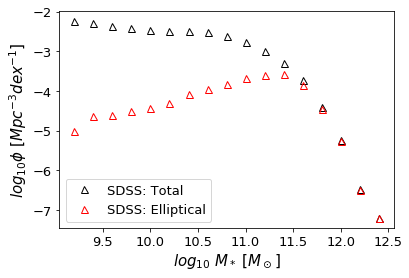

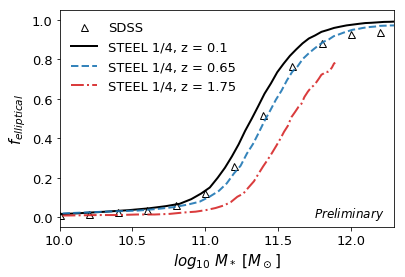

In [30]:
mpl.rcParams.update({'font.size': 13})
mpl.rcParams.update({'lines.markersize': 7})
mpl.rcParams.update({'lines.linewidth': 2})


#Add SDSS Data to plot
sm_binwidth = 0.2
sm_bins = np.arange(9, 12.5, sm_binwidth)

#Total Population
SM_All = np.array(df_cent.MsMendSerExp)
Vmax_All = np.array(df_cent.Vmaxwt)

Weights_All = Vmax_All
Weightsum_All = np.sum(Vmax_All)
totVmax_All = Weightsum_All/fracsky

hist_cent_All, edges_All = np.histogram(SM_All, bins = sm_bins, weights = Vmax_All)

Y_All = np.log10(np.divide(hist_cent_All, fracsky*sm_binwidth)*0.9195) #0.9195 correction of volume to Planck15

#Ellipticals Only
SM_Ell = np.array(df_cent.MsMendSerExp[(df_cent.TType<=0)&(df_cent.P_S0<0.5)])
Vmax_Ell = np.array(df_cent.Vmaxwt[(df_cent.TType<=0)&(df_cent.P_S0<0.5)])

Weights_Ell = Vmax_Ell
Weightsum_Ell = np.sum(Vmax_Ell)
totVmax_Ell = Weightsum_Ell/fracsky

hist_cent_Ell, edges = np.histogram(SM_Ell, bins = sm_bins, weights = Vmax_Ell)

Y_Ell = np.log10(np.divide(hist_cent_Ell, fracsky*sm_binwidth)*0.9195) #0.9195 correction of volume to Planck15

plt.plot(sm_bins[1:], Y_All, 'k^', label = "SDSS: Total", fillstyle = "none")
plt.plot(sm_bins[1:], Y_Ell, 'r^', label = "SDSS: Elliptical", fillstyle = "none")
plt.legend()
plt.xlabel("$log_{10}$ $M_*$ [$M_\odot$]", fontproperties = mpl.font_manager.FontProperties(size = 15))
plt.ylabel("$log_{10}  \phi$ $[Mpc^{-3} dex^{-1}]$", fontproperties = mpl.font_manager.FontProperties(size = 15))
plt.show()


F_Ell = np.power(10, Y_Ell - Y_All)
plt.plot(sm_bins[1:], F_Ell, "k^", label = "SDSS", fillstyle = "none")
plt.xlabel("$log_{10}$ $M_*$ [$M_\odot$]", fontproperties = mpl.font_manager.FontProperties(size = 15))
plt.ylabel("$f_{elliptical}$", fontproperties = mpl.font_manager.FontProperties(size = 15))
#plt.show()


Test = False
P_ellip = np.zeros_like(AvaStellarMass_G18)
MMR = np.log10(1/4) #mergermass ratio in log10
for i in range(np.shape(AvaStellarMass_G18)[0]-1, -1, -1):
    for j in range(np.shape(AvaStellarMass_G18)[1]-1, -1, -1):
        if Test:
            j=10
        Maj_Merge_Bin = np.digitize(AvaStellarMass_G18[i,j]+MMR, bins = Surviving_Sat_SMF_MassRange) #find the bin of the Surviving_Sat_SMF_MassRange above which is major mergers
        MM_Accretion_Density = np.sum(Accretion_History_G18[i,j,Maj_Merge_Bin:])*SM_Bin #sums the numberdensity of satellites causing major mergers
        Central_Number_Density = 1#HMF_fun(AvaHaloMass[i,j], z[i])*h_3*(AvaHaloMassBins[i,j])#/AvaStellarMassBins[i,j]) #Numberdensity of centrals
        Major_Frac = MM_Accretion_Density/(Central_Number_Density) #fraction of centrals exprenceing a major merger
        
        if i == 189:
            P_ellip[i,j] = Major_Frac #if this is the first step then the number turned is just the fraction
        else:
            P_ellip[i,j] = P_ellip[i+1,j] + Major_Frac*(1 - P_ellip[i+1,j]) #otherwise a major merger with a prexisting elliptical population is disconted
        if Test:
            #print(z[i], AvaHaloMass[i,j], AvaStellarMass[i,j], np.log10(Central_Number_Density), np.log10(MM_Accretion_Density), Major_Frac, P_ellip[i,j])
            print("{:0.4f} {:0.4f} {:0.4f} {:0.4f} {:0.4f} {:0.4f} {:0.4f}".format(z[i], AvaHaloMass[i,j], AvaStellarMass[i,j], np.log10(Central_Number_Density[0]), np.log10(MM_Accretion_Density), Major_Frac[0], P_ellip[i,j]))
            break
plt.plot(AvaStellarMass_G18[0], P_ellip[0], "-k",label = "STEEL 1/4, z = 0.1")
z_plot = 0.65
plt.plot(AvaStellarMass_G18[np.digitize(z_plot, bins = z)], P_ellip[np.digitize(z_plot, bins = z)], "--C0", alpha = 0.9,label = "STEEL 1/4, z = {}".format(z_plot))
z_plot = 1.75
plt.plot(AvaStellarMass_G18[np.digitize(z_plot, bins = z)], P_ellip[np.digitize(z_plot, bins = z)], "-.C3", alpha = 0.9,label = "STEEL 1/4, z = {}".format(z_plot))
plt.xlim(10, 12.3)

plt.text(11.75, 0, "$Preliminary$", fontsize=12)
plt.legend(frameon = False)
plt.show()

Calculate mass accretion via merger by integrating the mergers at each timestep

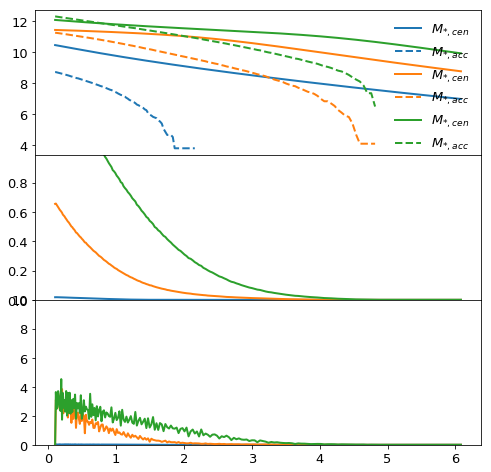

In [31]:
SatelliteMasses = np.power(10, Surviving_Sat_SMF_MassRange)
Mass_Accretion_PerCentral = np.zeros_like(AvaStellarMass_G18)
for i in range(np.shape(AvaStellarMass_G18)[0]-1, -1, -1):
    for j in range(np.shape(AvaStellarMass_G18)[1]-1, -1, -1): 
        Mass_Accretion_Density = np.sum(Accretion_History_G18[i,j]*SatelliteMasses)*SM_Bin #Calculates the total acreted stellar mass per Mpc^3        
        Central_Number_Density = 1#HMF_fun(AvaHaloMass[i,j], z[i])*h_3*(AvaHaloMassBins[i,j]) #Numberdensity of centrals
        MassAcc = Mass_Accretion_Density/Central_Number_Density
        if (j == None):
            print(Mass_Accretion_Density, Central_Number_Density, MassAcc)
        if MassAcc > 0:
            Mass_Accretion_PerCentral[i,j] = MassAcc
        else:
            Mass_Accretion_PerCentral[i,j] = 0
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)


f, SubPlots = plt.subplots(3, 1, figsize = (8,8), sharex = True)
for i in [10, 25, 40]:
    colour = next(colourcycler)
    #mass of the central against cumulative mass from satellite accretion
    SubPlots[0].plot(z, AvaStellarMass_G18[:,i], label = "$M_{*,cen}$", color = colour)
    SubPlots[0].plot(z, np.flip(np.log10(np.cumsum(np.flip(Mass_Accretion_PerCentral[:,i], 0))), 0), "--",label = "$M_{*,acc}$", color = colour)
    SubPlots[0].legend(frameon = False)


    #fraction of total mass from satellite accretion
    SubPlots[1].plot(z, np.power(10, np.flip(np.log10(np.cumsum(np.flip(Mass_Accretion_PerCentral[:,i], 0))), 0) - AvaStellarMass_G18[:,i]), color = colour)
    SubPlots[1].set_ylim(0, 0.99)


    #fraction of mass accretion at each epoch from satellites
    CentralMass = np.power(10, AvaStellarMass_G18[:,i])
    CentralMassGrowth = CentralMass[:-1] - CentralMass[1:]
    CentralMassGrowth = np.insert(CentralMassGrowth, -1,CentralMassGrowth[-1])
    SubPlots[2].plot(z, np.divide(Mass_Accretion_PerCentral[:,i], CentralMassGrowth), color = colour)
    SubPlots[2].set_ylim(0, 9.99)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [32]:
@jit#('double[:,:],double[:,:],double[:,:](double[:,:,:],double[:,:,:], double[:],double[:])')
def JitLoop(SHMF_Entering, Mass_Ratio_Bins, z_step, t_step):
    m, n, o = np.shape(SHMF_Entering)
    Accreted_Above_Ratio = np.zeros((m, n))
    Accreted_Above_Ratio_dz = np.zeros((m, n))
    Accreted_Above_Ratio_dt = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            Accreted_Above_Ratio[i,j] = np.sum(SHMF_Entering[i, j,Mass_Ratio_Bins[i,j]:])*SM_Bin
            Accreted_Above_Ratio_dz[i,j] = np.sum(SHMF_Entering[i, j,Mass_Ratio_Bins[i,j]:])*SM_Bin/z_step[i]
            Accreted_Above_Ratio_dt[i,j] = np.sum(SHMF_Entering[i, j,Mass_Ratio_Bins[i,j]:])*SM_Bin/t_step[i]
    return Accreted_Above_Ratio, Accreted_Above_Ratio_dz, Accreted_Above_Ratio_dt

@jit#('double[:,:],double[:,:],double[:,:](double[:,:,:],double[:,:,:],double[:],double[:], double[:])')
def JitLoop2(SHMF_Entering, Mass_Ratio_Bins, SatHaloMass, z_step, t_step):
    m, n, o = np.shape(SHMF_Entering)
    Accreted_Above_Ratio = np.zeros((m, n))
    Accreted_Above_Ratio_dz = np.zeros((m, n))
    Accreted_Above_Ratio_dt = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            Accreted_Above_Ratio[i,j] = np.sum(SHMF_Entering[i,j,Mass_Ratio_Bins[i,j]:]*SatHaloMass[Mass_Ratio_Bins[i,j]:])*SM_Bin
            Accreted_Above_Ratio_dz[i,j] = np.sum(SHMF_Entering[i,j,Mass_Ratio_Bins[i,j]:]*SatHaloMass[Mass_Ratio_Bins[i,j]:])*SM_Bin/z_step[i]
            Accreted_Above_Ratio_dt[i,j] = np.sum(SHMF_Entering[i,j,Mass_Ratio_Bins[i,j]:]*SatHaloMass[Mass_Ratio_Bins[i,j]:])*SM_Bin/t_step[i]
    return Accreted_Above_Ratio, Accreted_Above_Ratio_dz, Accreted_Above_Ratio_dt

In [33]:
print(np.shape(Accretion_History_G18))
print(np.shape(z))
z_step = z[1:] - z[:-1]
t_step = Cosmo.age(z[:-1]) - Cosmo.age(z[1:])
print(np.shape(z_step))
print(np.shape(Surviving_Sat_SMF_MassRange))
print(np.shape(AvaStellarMass_G18))
Mass_Ratio_Limit = AvaStellarMass_G18 + np.log10(1/6)
print(np.shape(Mass_Ratio_Limit))
Mass_Ratio_Bins = np.digitize(Mass_Ratio_Limit, bins = Surviving_Sat_SMF_MassRange)[:-1]
print(np.shape(Mass_Ratio_Bins))
Accreted_Above_Ratio, Accreted_Above_Ratio_dz, Accreted_Above_Ratio_dt =  JitLoop(Accretion_History_G18, Mass_Ratio_Bins, z_step, t_step)
print(np.shape(Accreted_Above_Ratio))

(190, 57, 40)
(190,)
(189,)
(40,)
(190, 57)
(190, 57)
(189, 57)
(190, 57)


NameError: name 'FakMa_MergerRate' is not defined

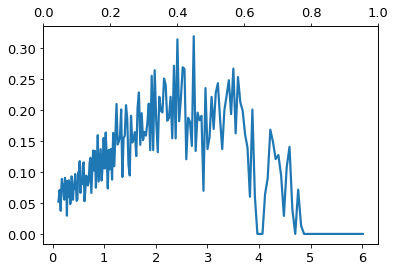

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twiny()#add time axis on top

lines = ["-", "--", "-.", ":"]
linecycler = cycle(lines)
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
for j, M0 in enumerate([11.2, 10.0]):
    colour = next(colourcycler)
    line = next(linecycler)
    Y_dt = []
    X = []
    for i in range(len(z[:-1])):
        try:
            M0_bin_zi = np.digitize(M0, bins = AvaStellarMass_G18[i]) -1
            #Y_dt.append(np.sum(Accreted_Above_Ratio_dt[i, M0_bin_zi:]*HMF_fun(AvaHaloMass[i, M0_bin_zi:], z[i])*h_3*AvaHaloMassBins[i, M0_bin_zi:]))
            Y_dt.append(Accreted_Above_Ratio_dt[i,M0_bin_zi])
            X.append(z[i])
        except:
            break
    ax.plot(X[1:], Y_dt[1:], line, label = r"$M_{*, cen} \sim$"+"$10^{%s}$"%M0+r"$M_{\odot}$", color = colour, linewidth = 2.2)
    ax.fill_between(z[1:], FakMa_MergerRate(10**(M0-0.2), z[1:])*(z_step/t_step), FakMa_MergerRate(10**(M0+0.2), z[1:])*(z_step/t_step), alpha = 0.5)
#print(Y_dt)
ax.set_yscale('log')
ax.set_ylim(10**(-7), 10**(-4))
ax.set_xlim(0.1, 2.5)
ax2.set_xlim(ax.get_xlim())
#Extra ticks
upper_x_tick_loc = [Cosmo.lookbackTime(2, inverse = True), Cosmo.lookbackTime(3, inverse = True), Cosmo.lookbackTime(5, inverse = True), Cosmo.lookbackTime(7, inverse = True), Cosmo.lookbackTime(11, inverse = True)]
ax2.set_xticks(upper_x_tick_loc)
ax2.set_xticklabels([2,3,5,7,11])
ax2.set_xlabel("Lookback Time [Gyr]")
ax2.minorticks_off()
ax.set_xlabel("$z$")
ax.set_ylabel("$dN/dt$ $[Mpc^{-3} Gyr^{-1}]$")
ax.text(0.25, 10**-6, r"$\frac{M_{*, sat}}{M_{*,cen}} > 0.3$")
ax.legend(loc = 4, frameon = False)
plt.tight_layout()
plt.savefig("./PaperTwoPlotData/HaloMergerRate.png")
plt.savefig("./PaperTwoPlotData/HaloMergerRate.pdf")
plt.show()